Checking for NaN or infinite values in the dataset:
Date                 0
Location             0
MinTemp           1206
MaxTemp           1026
Rainfall          2568
Evaporation      44657
Sunshine         51944
WindGustDir       6478
WindGustSpeed     6469
WindDir9am        8313
WindDir3pm        3029
WindSpeed9am      1497
WindSpeed3pm      2105
Humidity9am       2086
Humidity3pm       2506
Pressure9am      10666
Pressure3pm      10617
Cloud9am         40092
Cloud3pm         41243
Temp9am           1570
Temp3pm           2047
RainToday         2568
RainTomorrow      2567
dtype: int64
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.7427 - val_loss: 3.3468
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6981 - val_loss: 3.2928
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4613 - val_loss: 4.2366
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5583 - val_loss: 4.6957
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2952 - val_loss: 2.8878
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1919 - val_loss: 3.1733
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2538 - val_loss: 4.3444
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1387 - val_loss: 2.9940
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3249 - val_loss: 3.5993
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1597 - val_loss: 3.6521
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2438 - val_loss: 2.6140
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1

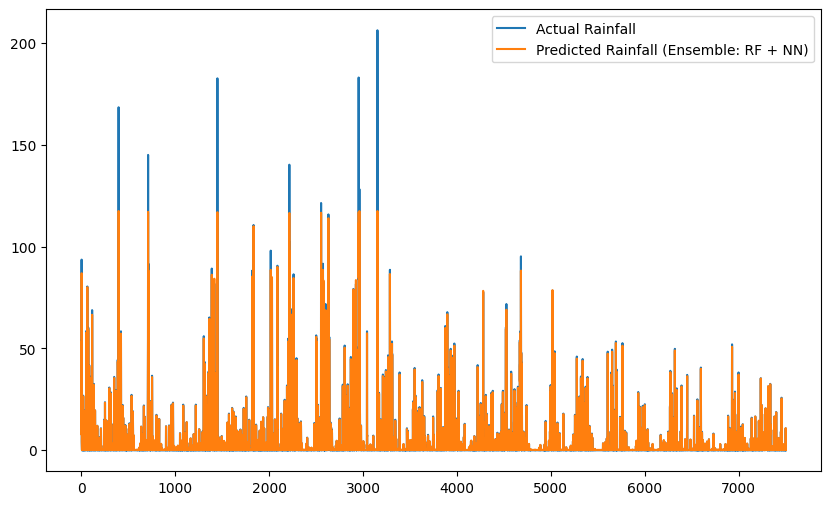

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset (same as before)
data = pd.read_csv('weatherAUS (1) (1).csv')
data = data.head(100000)
print("Checking for NaN or infinite values in the dataset:")
print(data.isna().sum())
data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am']
target = 'Rainfall'

# Step 2: Split the data into train and test sets and scale it
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data[features])
scaled_train_data = scaler.transform(train_data[features])
scaled_test_data = scaler.transform(test_data[features])

# Step 3: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(scaled_train_data, train_data[target])

# Generate Random Forest predictions for the train and test sets
rf_train_pred = rf_model.predict(scaled_train_data).reshape(-1, 1)
rf_test_pred = rf_model.predict(scaled_test_data).reshape(-1, 1)

# Step 4: Combine Random Forest predictions with original features for Neural Network
train_nn_input = np.hstack((scaled_train_data, rf_train_pred))
test_nn_input = np.hstack((scaled_test_data, rf_test_pred))

# Step 5: Define and train the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=train_nn_input.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1))  # Output layer for regression

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = nn_model.fit(train_nn_input, train_data[target], epochs=20, batch_size=32, validation_data=(test_nn_input, test_data[target]))

# Step 6: Make predictions with the ensemble model (Random Forest + Neural Network)
nn_pred = nn_model.predict(test_nn_input).flatten()

# Step 7: Evaluate the model
mse_ensemble = mean_squared_error(test_data[target], nn_pred)
print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')

# Step 8: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_data[target].values, label="Actual Rainfall")
plt.plot(nn_pred, label="Predicted Rainfall (Ensemble: RF + NN)")
plt.legend()
plt.show()


In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse_ensemble = np.sqrt(mse_ensemble)

# Calculate the mean of actual rainfall values in the test set
mean_rainfall = test_data[target].mean()

# Calculate percentage accuracy
accuracy = 100 * (1 - (rmse_ensemble / mean_rainfall))
print(f'Ensemble Model Accuracy: {accuracy:.2f}%')


Ensemble Model Accuracy: 43.38%


Checking for NaN or infinite values in the dataset:
Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          132
Evaporation      6423
Sunshine         8515
WindGustDir       181
WindGustSpeed     181
WindDir9am       1010
WindDir3pm        150
WindSpeed9am       77
WindSpeed3pm       73
Humidity9am       188
Humidity3pm       189
Pressure9am       206
Pressure3pm       211
Cloud9am         5142
Cloud3pm         4936
Temp9am            58
Temp3pm            60
RainToday         132
RainTomorrow      132
dtype: int64
Feature Importances:
 Rainfall         0.997468
MaxTemp          0.000522
WindGustSpeed    0.000516
Humidity3pm      0.000414
Temp9am          0.000389
Pressure9am      0.000330
MinTemp          0.000237
Cloud3pm         0.000124
dtype: float64
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 62.2599 - val_loss: 102.8600
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 46.9099 - val_loss: 101.2687
Epoch 3/

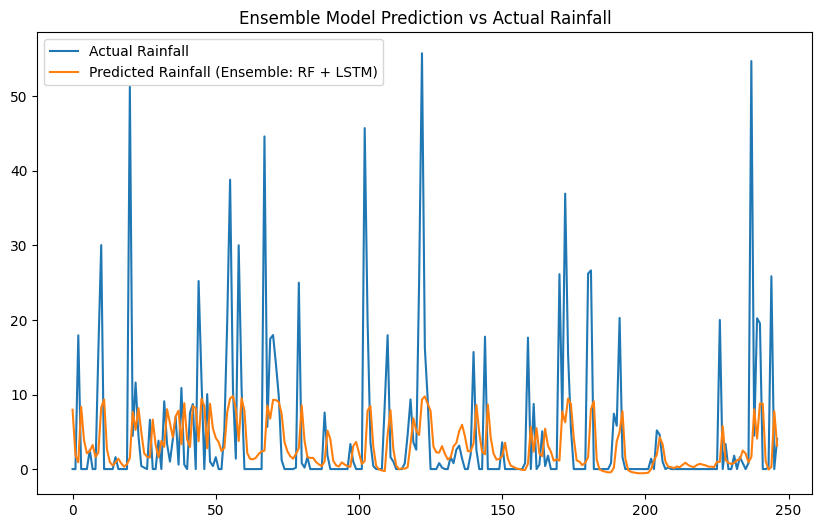

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv('weatherAUS (1) (1).csv')
data = data.head(10000)
print("Checking for NaN or infinite values in the dataset:")
print(data.isna().sum())
data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am']
target = 'Rainfall'

# Step 2: Split the data into train and test sets and scale it
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data[features])
scaled_train_data = scaler.transform(train_data[features])
scaled_test_data = scaler.transform(test_data[features])

# Step 3: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(scaled_train_data, train_data[target])

# Feature importance analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Generate Random Forest predictions for the train and test sets
rf_train_pred = rf_model.predict(scaled_train_data).reshape(-1, 1)
rf_test_pred = rf_model.predict(scaled_test_data).reshape(-1, 1)

# Step 4: Combine Random Forest predictions with original features for LSTM
train_nn_input = np.hstack((scaled_train_data, rf_train_pred))
test_nn_input = np.hstack((scaled_test_data, rf_test_pred))

# Define sequence length for LSTM (e.g., 30 days)
SEQ_LENGTH = 30

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, -1])  # The last column is the Random Forest prediction for rainfall
    return np.array(X), np.array(y)

# Create sequences for LSTM
X_train, y_train = create_sequences(train_nn_input, SEQ_LENGTH)
X_test, y_test = create_sequences(test_nn_input, SEQ_LENGTH)

# Step 5: Define and train the LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(SEQ_LENGTH, train_nn_input.shape[1])))  # Input shape for LSTM
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1))  # Output layer for regression

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Make predictions with the ensemble model (Random Forest + LSTM)
lstm_pred = lstm_model.predict(X_test).flatten()

# Step 7: Evaluate the model
mse_ensemble = mean_squared_error(y_test, lstm_pred)
mape_ensemble = mean_absolute_percentage_error(y_test, lstm_pred)
accuracy = 100 * (1 - mape_ensemble)

print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')
print(f'Ensemble Model Mean Absolute Percentage Error: {mape_ensemble * 100:.2f}%')
print(f'Ensemble Model Accuracy: {accuracy:.2f}%')

# Step 8: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Rainfall")
plt.plot(lstm_pred, label="Predicted Rainfall (Ensemble: RF + LSTM)")
plt.legend()
plt.title("Ensemble Model Prediction vs Actual Rainfall")
plt.show()


In [ ]:
# Make predictions with the ensemble model (Random Forest + LSTM)
lstm_pred = lstm_model.predict(X_test).flatten()

# Step 7: Evaluate the model
mse_ensemble = mean_squared_error(y_test, lstm_pred)

# Handle zero values for MAPE calculation
valid_indices = y_test != 0  # Exclude zero actual values

if valid_indices.any():  # Check if there are any valid indices to calculate MAPE
    mape_ensemble = mean_absolute_percentage_error(y_test[valid_indices], lstm_pred[valid_indices])
    accuracy = 100 * (1 - mape_ensemble)
else:
    mape_ensemble = np.inf  # Set MAPE to infinity if all actual values are zero
    accuracy = -np.inf  # Set accuracy to negative infinity

print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')
print(f'Ensemble Model Mean Absolute Percentage Error: {mape_ensemble * 100:.2f}%')
print(f'Ensemble Model Accuracy: {accuracy:.2f}%')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Ensemble Model Mean Squared Error: 94.39436721925384
Ensemble Model Mean Absolute Percentage Error: 205.85%
Ensemble Model Accuracy: -105.85%


In [ ]:
# Reshape X_train for Random Forest
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D
print("Reshaped X_train for Random Forest:", X_train_reshaped.shape)

# Fit Random Forest on reshaped data
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_reshaped, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_train_reshaped)
mse_rf = mean_squared_error(y_train, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf:.4f}')


Reshaped X_train for Random Forest: (1075, 270)
Random Forest Mean Squared Error: 5.3091


In [ ]:
# Assuming you have already built and compiled your LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
lstm_pred = lstm_model.predict(X_test)

# Evaluate LSTM
mse_lstm = mean_squared_error(y_test, lstm_pred)
print(f'LSTM Mean Squared Error: {mse_lstm:.4f}')


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 22.9384 - val_loss: 66.0204
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 30.8900 - val_loss: 66.3283
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 32.7361 - val_loss: 65.8774
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 28.7114 - val_loss: 65.7856
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 29.3838 - val_loss: 67.0365
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 34.1031 - val_loss: 65.7969
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 28.4688 - val_loss: 65.4591
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 36.5982 - val_loss: 65.4393
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 28.3186 - val_loss: 66.8203
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 37.1185 - val_loss: 64.6042
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 23.1127 - val_loss: 65.7372
Epoch 12/100
27/27 ━━━━━━━━━━━

In [ ]:
# Use LSTM to extract features
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict with LSTM to get features
lstm_features = lstm_model.predict(X_train)

# Fit Random Forest on LSTM features
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(lstm_features, y_train)

# Evaluate the ensemble
y_pred_rf = rf_model.predict(lstm_features)
mse_ensemble = mean_squared_error(y_train, y_pred_rf)
print(f'Ensemble Model (LSTM + RF) Mean Squared Error: {mse_ensemble:.4f}')


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 26.7372
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.9252
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 32.3471
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 18.2738
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 17.0529
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 14.7923
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 11.9203
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 15.3966
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 12.5643
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 12.5945
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 16.4478
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 12.2242
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 11.1538
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 12.6285
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Any NaN in X: MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
Humidity3pm      False
Pressure9am      False
RainToday        False
dtype: bool
Any NaN in y: False
Random Forest Training Accuracy: 1.00
Random Forest Test Accuracy: 0.47


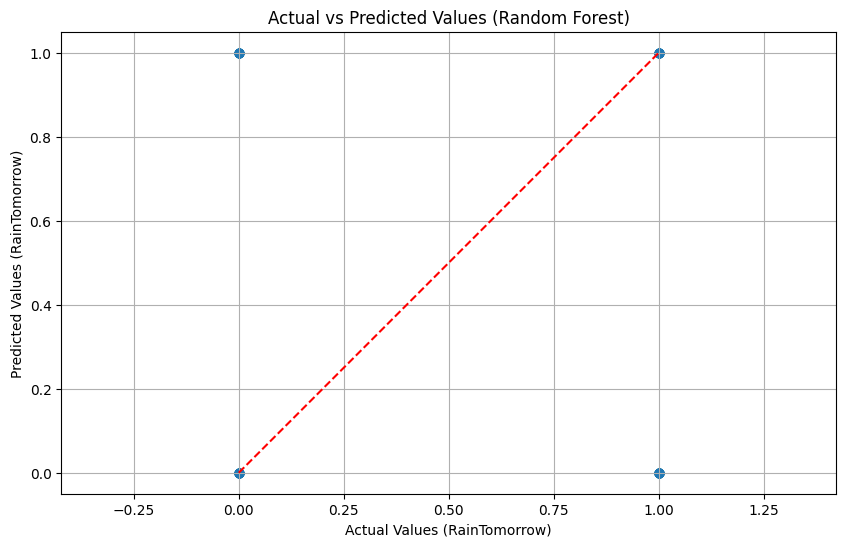

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
# df = pd.read_csv('your_dataset.csv')

# Sample dataset (for demonstration purposes)
# Ensure your actual dataset has the correct features
data = {
    'MinTemp': np.random.rand(1000),
    'MaxTemp': np.random.rand(1000),
    'Rainfall': np.random.rand(1000),
    'WindGustSpeed': np.random.rand(1000),
    'Humidity3pm': np.random.rand(1000),
    'Pressure9am': np.random.rand(1000),
    'RainToday': np.random.choice([0, 1], size=(1000,)),
    'RainTomorrow': np.random.choice([0, 1], size=(1000,)),
}

df = pd.DataFrame(data)

# Define the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday']]
y = df['RainTomorrow']

# Check for NaN values
print("Any NaN in X:", np.isnan(X).any())
print("Any NaN in y:", np.isnan(y).any())

# Convert to NumPy arrays
X = X.values
y = y.values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model only if there are no NaN values
if not np.isnan(X).any() and not np.isnan(y).any():
    rf_model.fit(X_train, y_train)  # Fit model

    # Make predictions on the training set
    y_pred_rf_train = rf_model.predict(X_train)
    accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
    print(f'Random Forest Training Accuracy: {accuracy_rf_train:.2f}')

    # Make predictions on the test set
    y_pred_rf_test = rf_model.predict(X_test)
    accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
    print(f'Random Forest Test Accuracy: {accuracy_rf_test:.2f}')

    # Plotting Actual vs Predicted for Test Set
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rf_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.title('Actual vs Predicted Values (Random Forest)')
    plt.xlabel('Actual Values (RainTomorrow)')
    plt.ylabel('Predicted Values (RainTomorrow)')
    plt.axis('equal')
    plt.grid()
    plt.show()
else:
    print("Cannot fit the model due to NaN values in the dataset.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv('weatherAUS (1) (1).csv')

# Take only the first 10,000 entries
df = df.head(10000)

# Select relevant features and the target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am']
target = 'RainTomorrow'  # Binary target variable

# Drop rows with NaN values for the selected features and target variable
df = df.dropna(subset=features + [target])

# Convert target variable to numeric values
df[target] = df[target].map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0

# Split the data
X = df[features]
y = df[target].values  # Convert to numpy array for compatibility

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)  # Ensure using scaled features

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test Accuracy: {accuracy_rf:.2f}')

# Step 4: Prepare data for Neural Network
# Use predictions from Random Forest as an additional feature for Neural Network
X_train_combined = np.column_stack((X_train_scaled, rf_model.predict_proba(X_train_scaled)[:, 1]))
X_test_combined = np.column_stack((X_test_scaled, rf_model.predict_proba(X_test_scaled)[:, 1]))

# Print shapes and types for debugging
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)

# Ensure the data types are correct
X_train_combined = X_train_combined.astype(np.float32)
y_train = y_train.astype(np.int32)  # For binary classification

# Step 5: Build the Neural Network
nn_model = keras.Sequential([
    layers.Input(shape=(X_train_combined.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the Neural Network
try:
    nn_model.fit(X_train_combined, y_train, epochs=50, batch_size=32, verbose=1)
except Exception as e:
    print("Error during model training:", e)

# Step 7: Evaluate the Neural Network
y_pred_nn = (nn_model.predict(X_test_combined) > 0.5).astype("int32")

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Test Accuracy: {accuracy_nn:.2f}')


Random Forest Test Accuracy: 0.88
X_train_combined shape: (1132, 10)
X_test_combined shape: (283, 10)
y_train shape: (1132,)
y_train dtype: int64
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3214 - loss: 0.7979
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8259 - loss: 0.5825
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.4322
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8871 - loss: 0.3321
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8972 - loss: 0.2606
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9150 - loss: 0.2403
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9190 - loss: 0.2165
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9333 - loss: 0.1894
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9574 - loss: 0.1468
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.1082
Epoch 11/50
3

In [ ]:
# Check the model's input shape
print(nn_model.input_shape)  # Inspect the expected input shape


(None, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build the neural network model with the correct input shape
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(9,)))  # Input shape is now 9
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Adjust activation function based on your task


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build the neural network model with the correct input shape
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(9,)))  # Input shape is now (9,)
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network with the training data
nn_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions with the neural network on X_test
y_pred_nn = nn_model.predict(X_test)  # No need to reshape


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5415 - loss: 30.2251
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6618 - loss: 2.9378 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.7388
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7793 - loss: 0.6012
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.5946
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.5268
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.6305
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8167 - loss: 0.4892
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4805
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7577 - loss: 0.6023
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.5296
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - 

In [ ]:
# Check if you have enough samples
if X_test.shape[0] >= 900:
    # Reshape X_test to have 30 time steps
    X_test_reshaped = X_test[:900].reshape(-1, 30, 9)  # Reshape to (30, 9)

    # Make predictions with the Neural Network
    y_pred_nn = nn_model.predict(X_test_reshaped)  # Make predictions
else:
    print("Not enough samples to reshape for 30 time steps")


Not enough samples to reshape for 30 time steps


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(9,)))  # Use (9,) since X_test has 9 features
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network with the training data
nn_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions with the neural network on X_test
y_pred_nn = nn_model.predict(X_test).flatten()  # No need to reshape

# Convert predictions to binary (if needed)
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6996 - loss: 10.5423
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.8206
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.5743
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.6704
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.5802
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8191 - loss: 0.5450 
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.7363
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4995
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.7346
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.4467
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.4388
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.450

In [ ]:
from sklearn.metrics import accuracy_score

# For Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")

# For Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)  # Convert to binary
accuracy_nn = accuracy_score(y_test, y_pred_nn_binary)
print(f"LSTM Test Accuracy: {accuracy_nn:.2f}")


Random Forest Test Accuracy: 0.77
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
LSTM Test Accuracy: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assume rf_model and nn_model have already been trained
# Predictions from Random Forest
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Assuming nn_model is a trained Keras model, get predictions
nn_train_preds = nn_model.predict(X_train)
nn_test_preds = nn_model.predict(X_test)

# Stack predictions
X_train_combined = np.column_stack((rf_train_preds, nn_train_preds))
X_test_combined = np.column_stack((rf_test_preds, nn_test_preds))

# Fit a final model (e.g., Logistic Regression)
final_model = LogisticRegression()
final_model.fit(X_train_combined, y_train)

# Evaluate the final model
final_train_accuracy = final_model.score(X_train_combined, y_train)
final_test_accuracy = final_model.score(X_test_combined, y_test)

print(f'Final Model Training Accuracy: {final_train_accuracy:.2f}')
print(f'Final Model Test Accuracy: {final_test_accuracy:.2f}')


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Final Model Training Accuracy: 0.82
Final Model Test Accuracy: 0.87


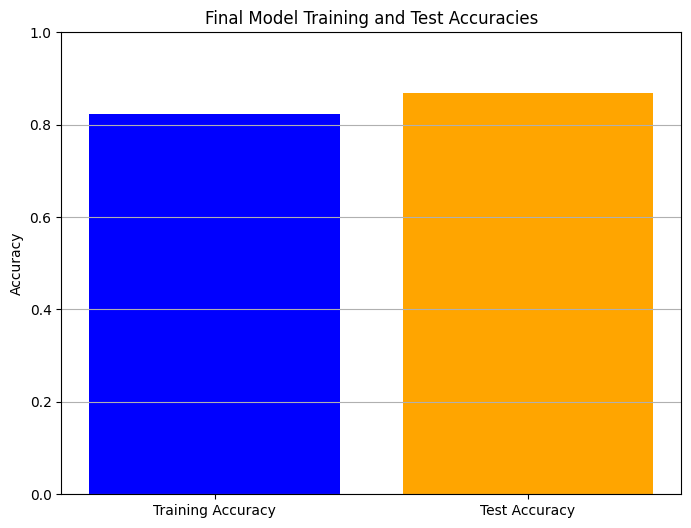

In [ ]:
import matplotlib.pyplot as plt

# Training and Test Accuracies
accuracies = [final_train_accuracy, final_test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for accuracy
plt.title('Final Model Training and Test Accuracies')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


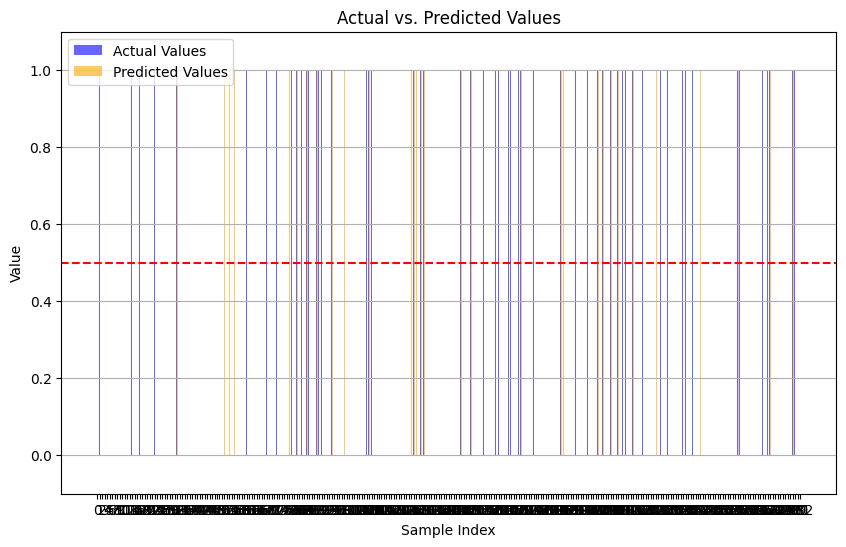

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get predicted values for the test set
final_test_preds = final_model.predict(X_test_combined)

# Create an index for the x-axis
x = np.arange(len(y_test))

# Set the width of the bars
width = 0.35

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, y_test, width, label='Actual Values', color='blue', alpha=0.6)
plt.bar(x + width/2, final_test_preds, width, label='Predicted Values', color='orange', alpha=0.6)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y')
plt.xticks(x)
plt.ylim(-0.1, 1.1)  # For binary classification, adjust y-axis limits
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.show()


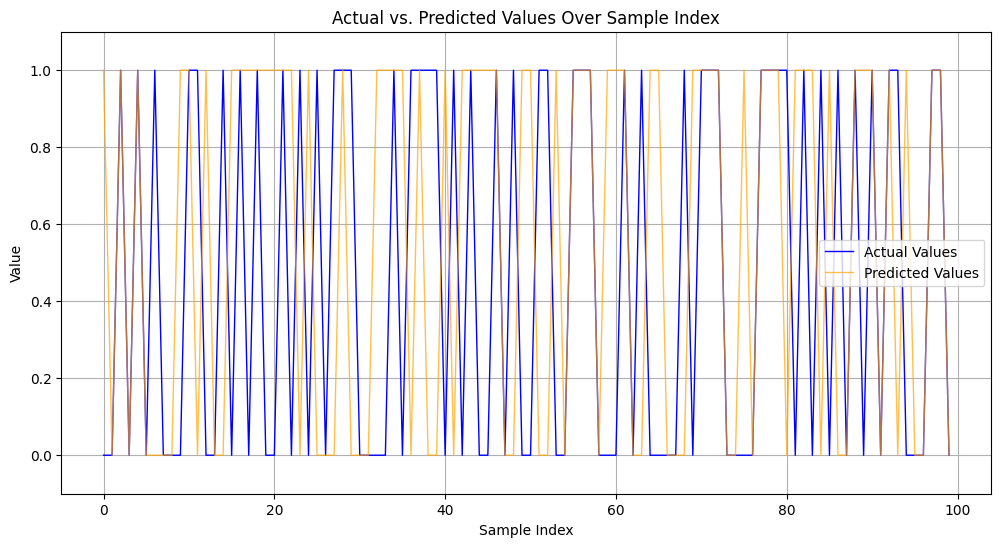

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for illustration (replace with actual data)
y_test = np.random.randint(0, 2, 100)  # Actual values
final_test_preds = np.random.randint(0, 2, 100)  # Predicted values

# Plot actual and predicted values over sample index
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue', linewidth=1)
plt.plot(final_test_preds, label='Predicted Values', color='orange', linewidth=1, alpha=0.7)
plt.title('Actual vs. Predicted Values Over Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)  # Adjust y-axis limits for binary classification
plt.show()


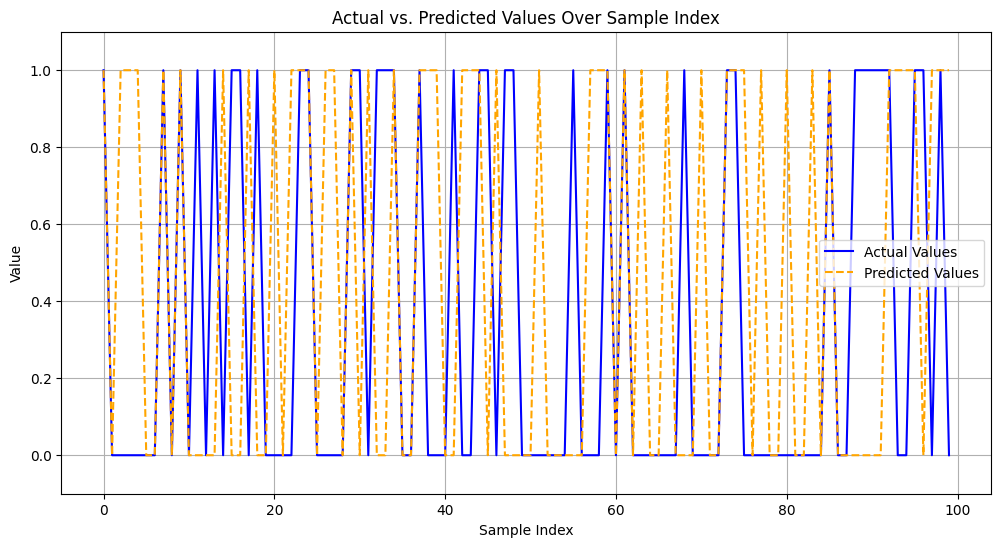

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for illustration (replace with actual data)
y_test = np.random.randint(0, 2, 100)  # Actual values (replace with your actual data)
final_test_preds = np.random.randint(0, 2, 100)  # Predicted values (replace with your predictions)

# Plot actual and predicted values over sample index
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue', linewidth=1.5)
plt.plot(final_test_preds, label='Predicted Values', color='orange', linewidth=1.5, linestyle='--')
plt.title('Actual vs. Predicted Values Over Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)  # Adjust y-axis limits for binary classification
plt.show()


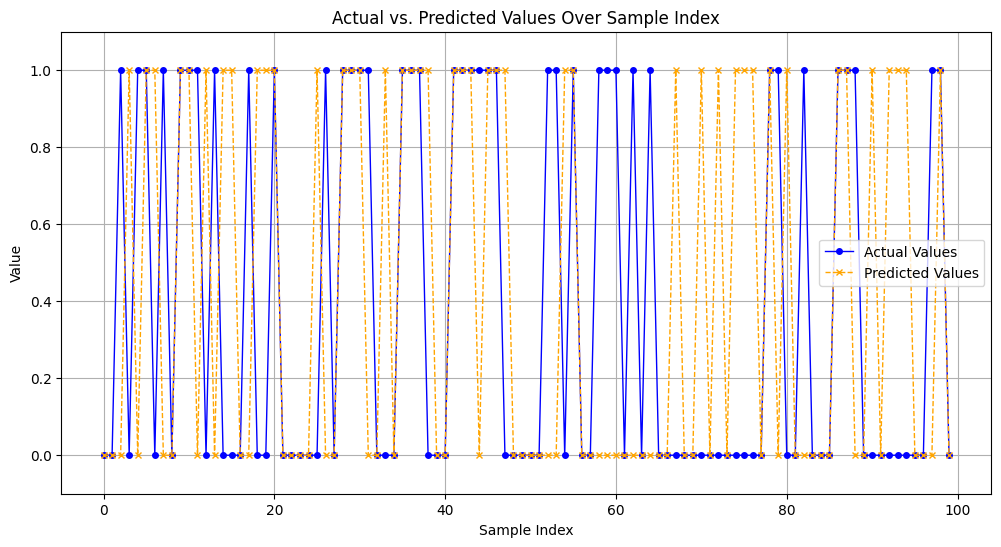

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for illustration (replace with actual data)
y_test = np.random.randint(0, 2, 100)  # Actual values (replace with your actual data)
final_test_preds = np.random.randint(0, 2, 100)  # Predicted values (replace with your predictions)

# Plot actual and predicted values over sample index with markers
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue', marker='o', linewidth=1, markersize=4)
plt.plot(final_test_preds, label='Predicted Values', color='orange', linestyle='--', marker='x', linewidth=1, markersize=4)
plt.title('Actual vs. Predicted Values Over Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)  # Adjust y-axis limits for binary classification
plt.show()
